In this notebook, I fit the linear drift of the radio source coordinate time series.

Several implementations of linear regression were tested and the results were compared.
Almost same results were obtained when using the same algorithm of weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My progs
from my_progs.vlbi.ts_func import get_ts

In [2]:
souname = "2250+190"
coordts = get_ts(souname, calc_oft=True)

In [3]:
coordts

mjd,ra,dec,ra_err,dec_err,ra_dec_corr,used_obs,iers_name,ivs_name,db_name,jyear,dra,ddec,rho,pa,type
,deg,deg,mas,mas,,,,,,,mas,mas,mas,,
float64,float64,float64,float64,float64,float64,int64,str8,str8,str9,float64,float64,float64,float64,float64,str1
50084.998,343.280704715375,19.709618708083,0.3015,0.7035,-0.14,65,2250+190,2250+194,96JAN02XV,1996.004101300479,-0.5579998287430498,-1.3240011966786367,1.436782160831535,202.85297865232755,O
50155.831,343.280704830542,19.70961932525,0.4692,0.5334,-0.482,106,2250+190,2250+194,96MAR13XV,1996.198031485284,-0.14339868812385245,0.8978000039405741,0.9091798671502448,350.9252243447383,O
50771.252,343.280705004417,19.709618870639,0.3085,0.6257,-0.41,11,2250+190,2250+194,97NOV18XE,1997.8829623545516,0.4825512405659537,-0.738799587907124,0.8824287681526918,146.8492053956925,O
50800.34,343.280704824792,19.7096190445,0.0801,0.0986,-0.059,147,2250+190,2250+194,97DEC17XA,1997.9626009582478,-0.16409867384936658,-0.11289999974906094,0.19918530242580337,235.47202895975434,O
50827.252,343.280704951583,19.709619281167,0.4281,1.0295,-0.414,4,2250+190,2250+194,98JAN13XE,1998.036281998631,0.2923489546446944,0.7391012090351977,0.7948197962300239,21.581104810804476,O
50911.252,343.280704980792,19.709619025472,0.7084,1.1986,-0.661,4,2250+190,2250+194,98APR07XE,1998.2662614647502,0.3975013214585487,-0.18140078879014251,0.43693654772172397,114.5297116329772,O
50995.252,343.2807048345,19.709619178722,0.5693,0.937,-0.358,7,2250+190,2250+194,98JUN30XE,1998.4962409308694,-0.12914986200485143,0.3702992088960854,0.3921749494357574,340.77263693250484,O
51065.252,343.280704868667,19.709619368472,0.4552,0.7459,-0.317,7,2250+190,2250+194,98SEP08XE,1998.6878904859684,-0.0061487071434385135,1.0533992110595134,1.0534171559550094,359.6655529715231,O


# 1 Linear drift test

## 1.1 Without weights, with intercept

In [4]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

mjy = np.array(coordts["jyear"])
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg1 = regr1.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra1 = reg1.predict(mjy)

# The coefficients
print("t_0 = 0")
print("Coefficients: %.3f mas/yr" % reg1.coef_[0])
print("Interception: %.3f mas" % reg1.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra1))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra1))

t_0 = 0
Coefficients: -0.113 mas/yr
Interception: 226.487 mas
Mean squared error: 102.24
Coefficient of determination: 0.00


In [5]:
# Create linear regression object
mjy = np.array(coordts["jyear"]-2000)
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg1_a = regr1.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra1_a = reg1_a.predict(mjy)

# The coefficients
print("t_0 = 2000")
print("Coefficients: %.3f mas/yr" % reg1_a.coef_[0])
print("Interception: %.3f mas" % reg1_a.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra1_a))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra1_a))

t_0 = 2000
Coefficients: -0.113 mas/yr
Interception: 0.307 mas
Mean squared error: 102.24
Coefficient of determination: 0.00


In [6]:
mjy = np.array(coordts["jyear"]-2015)
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg1_b = regr1.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra1_b = reg1_b.predict(mjy)

# The coefficients
print("t_0 = 2000")
print("Coefficients: %.3f mas/yr" % reg1_b.coef_[0])
print("Interception: %.3f mas" % reg1_b.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra1_b))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra1_b))

t_0 = 2000
Coefficients: -0.113 mas/yr
Interception: -1.390 mas
Mean squared error: 102.24
Coefficient of determination: 0.00


## 1.2 -- Without weights, without intercept

In [7]:
# Create linear regression object
regr2 = linear_model.LinearRegression(fit_intercept=False)

mjy = np.array(coordts["jyear"])
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg2 = regr2.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra2 = reg2.predict(mjy)

# The coefficients
print("Coefficients: %.3f mas/yr" % reg2.coef_[0])
print("Interception: %.3f mas" % reg2.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra2))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra2))

Coefficients: -0.001 mas/yr
Interception: 0.000 mas
Mean squared error: 102.73
Coefficient of determination: 0.00


## 1.3 -- With weights, with intercept

In [8]:
# Create linear regression object
mjy = np.array(coordts["jyear"]-2015)
mjy = mjy[:, np.newaxis]

wgt = np.sum(1 / coordts["ra_err"]**2) / coordts["ra_err"]**2

# Train the model using the training sets
reg3 = regr1.fit(mjy, coordts["dra"], wgt)

# # Make predictions using the testing set
dra3 = reg3.predict(mjy)

# The coefficients
print("Coefficients: %.3f mas/yr" % reg3.coef_[0])
print("Interception: %.3f mas" % reg3.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra3))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra3))

Coefficients: -0.007 mas/yr
Interception: -0.108 mas
Mean squared error: 103.70
Coefficient of determination: -0.01


## 1.4 -- With weights, without intercept

In [9]:
# Create linear regression object
mjy = np.array(coordts["jyear"]-2015)
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg4 = regr2.fit(mjy, coordts["dra"], 1 / coordts["ra_err"]**2)

# # Make predictions using the testing set
dra4 = reg4.predict(mjy)

# The coefficients
print("Coefficients: %.3f mas/yr" % reg4.coef_[0])
print("Interception: %.3f mas" % reg4.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra4))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra4))

Coefficients: 0.001 mas/yr
Interception: 0.000 mas
Mean squared error: 103.96
Coefficient of determination: -0.01


## 1.5 -- RANSAC algorithm

In [10]:
ransac = linear_model.RANSACRegressor()
reg5 = ransac.fit(mjy, coordts["dra"], 1 / coordts["ra_err"]**2)
inlier_mask = reg5.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
dra5 = reg5.predict(mjy)

## 1.6 Ordinary Least Square (OLS) from statsmodels

In [11]:
import statsmodels.api as sm

In [12]:
mjy = np.array(coordts["jyear"]-2015)
mjy = sm.add_constant(mjy)

mod_ols = sm.OLS(coordts["dra"], mjy)
res_ols = mod_ols.fit()

print(res_ols.summary())
dra6 = res_ols.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8723
Date:                Mon, 19 Apr 2021   Prob (F-statistic):              0.352
Time:                        19:59:27   Log-Likelihood:                -675.60
No. Observations:                 181   AIC:                             1355.
Df Residuals:                     179   BIC:                             1362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3897      0.815     -1.705      0.0

## 1.7 Weighted Least Square (WLS) from statsmodels

In [13]:
mjy = np.array(coordts["jyear"]-2015)
mjy = sm.add_constant(mjy)

mod_wls = sm.WLS(coordts["dra"], mjy, weights=1./(coordts["ra_err"] ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

dra7 = res_wls.fittedvalues

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2665
Date:                Mon, 19 Apr 2021   Prob (F-statistic):              0.606
Time:                        19:59:27   Log-Likelihood:                -396.05
No. Observations:                 181   AIC:                             796.1
Df Residuals:                     179   BIC:                             802.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1083      0.107     -1.012      0.3

In [14]:
res_wls.params

array([-0.10829826, -0.00710649])

In [15]:
res_wls.bse

array([0.10698383, 0.01376635])

## 1.8 Curve_fit

In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: linear_fit.py
"""
Created on Thu Mar 28 10:40:19 2019

@author: Neo(liuniu@smail.nju.edu.cn)
"""


import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a + b * x


def linear_fit1(x, y, yerr=None, return_mod=False):
    """(Weighted) Linear fitting of y(x) = offset + drift * x

    Parameters
    ---------
    x / y : series

    Returns
    -------
    offset/offset_err : float
        estimate and formal uncertainty of offset
    drift/drift_err : float
        estimate and formal uncertainty of offset
    y_model : array_like of float
        predicition series from linear model of y
    """

    if yerr is None:
        popt, pcov = curve_fit(linear_func, x, y)
    else:
        popt, pcov = curve_fit(
            linear_func, x, y, sigma=yerr, absolute_sigma=True)

    offset, drift = popt
    offset_err, drift_err = sqrt(pcov[0, 0]), sqrt(pcov[1, 1])
    corr = pcov[0, 1] / offset_err / drift_err

    # Prediction
    y_model = linear_func(x, *popt)

    if return_mod:
        return offset, offset_err, drift, drift_err, corr, y_model
    else:
        return offset, offset_err, drift, drift_err, corr
    
def linear_fit2(x, y, yerr=None, return_mod=False):
    """(Weighted) Linear fitting of y(x) = offset + drift * x

    Parameters
    ---------
    x / y : series

    Returns
    -------
    offset/offset_err : float
        estimate and formal uncertainty of offset
    drift/drift_err : float
        estimate and formal uncertainty of offset
    y_model : array_like of float
        predicition series from linear model of y
    """

    if yerr is None:
        popt, pcov = curve_fit(linear_func, x, y)
    else:
        popt, pcov = curve_fit(
            linear_func, x, y, sigma=yerr, absolute_sigma=False)

    offset, drift = popt
    offset_err, drift_err = sqrt(pcov[0, 0]), sqrt(pcov[1, 1])
    corr = pcov[0, 1] / offset_err / drift_err

    # Prediction
    y_model = linear_func(x, *popt)

    if return_mod:
        return offset, offset_err, drift, drift_err, corr, y_model
    else:
        return offset, offset_err, drift, drift_err, corr

In [17]:
mjy = np.array(coordts["jyear"]-2015)
pmt1 = linear_fit1(mjy, coordts["dra"], yerr=coordts["ra_err"], return_mod=True)
pmt2 = linear_fit2(mjy, coordts["dra"], yerr=coordts["ra_err"], return_mod=True)

se = np.vstack([[pmt1[1], pmt1[3]], 
                [pmt2[1], pmt2[3]]])
se = np.round(se, 4)

colnames = ["x0_err", "x1_err"]
rownames = ["ABS", "RET"]

tab = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)

print("Formal errors are ")
print(tab)

Formal errors are 
    x0_err x1_err
-----------------
ABS 0.0174 0.0022
RET  0.107 0.0138
-----------------


In [18]:
se = np.vstack([[reg1.coef_[0], reg1.intercept_], 
                [reg2.coef_[0], reg2.intercept_], 
                [reg3.coef_[0], reg3.intercept_],
                [reg4.coef_[0], reg4.intercept_], 
                [0, 0],
                [res_ols.params[1], res_ols.params[0]], 
                [res_wls.params[1], res_wls.params[0]],
                [pmt1[2], pmt1[0]], 
                [pmt2[2], pmt2[0]]])

se = np.round(se, 4)

colnames = ["x1", "x0"]
rownames = ["SK_OWI", "SK_ONI", "SK_WWI", "SK_WNI", "SK_RAN",
           "ST_OLS", "ST_WLS", "CF_ABS", "CF_RET"]

tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

          x1      x0  
----------------------
SK_OWI -0.0071 -0.1083
SK_ONI  0.0009     0.0
SK_WWI -0.0071 -0.1083
SK_WNI  0.0009     0.0
SK_RAN     0.0     0.0
ST_OLS -0.1131 -1.3897
ST_WLS -0.0071 -0.1083
CF_ABS -0.0071 -0.1083
CF_RET -0.0071 -0.1083
----------------------


(-10.0, 10.0)

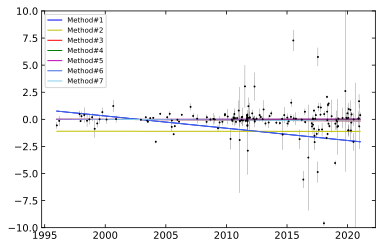

In [19]:
# Plot outputs
plt.errorbar(coordts["jyear"], coordts["dra"], yerr=coordts["ra_err"], 
             color="black", ms=2, fmt=".", elinewidth=0.2)
plt.plot(coordts["jyear"], dra1, color="b", linewidth=1, label="Method#1")
plt.plot(coordts["jyear"], dra2, color="y", linewidth=1, label="Method#2")
plt.plot(coordts["jyear"], dra3, color="r", linewidth=1, label="Method#3")
plt.plot(coordts["jyear"], dra4, color="g", linewidth=1, label="Method#4")
plt.plot(coordts["jyear"], dra5, color="m", linewidth=1, label="Method#5")
plt.plot(coordts["jyear"], dra6, color="royalblue", linewidth=1, label="Method#6")
plt.plot(coordts["jyear"], dra7, color="skyblue", linewidth=1, label="Method#7")

plt.legend(fontsize="x-small")
plt.ylim([-10, 10])